# Task 2 : Exploratory Data Analysis (EDA)

**Step 1** : first of of all i will uplode titanic dataset file.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


**Step 2**: Load the Dataset Using Pandas

In [3]:
import pandas as pd # importing pandas library

In [4]:
df = pd.read_csv('Titanic-Dataset.csv')  # Load the dataset

In [5]:
df.head()   # Display the first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Step 3**: Generate Summary Statistics

In [6]:
df.info()  # Basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe() # Summary statistics for numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Step 4**: Create Histograms and Boxplots
    
These will help us visualize distributions and spot outliers.



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # Set Style

* Now i am ploting histograms for Numeric Columns

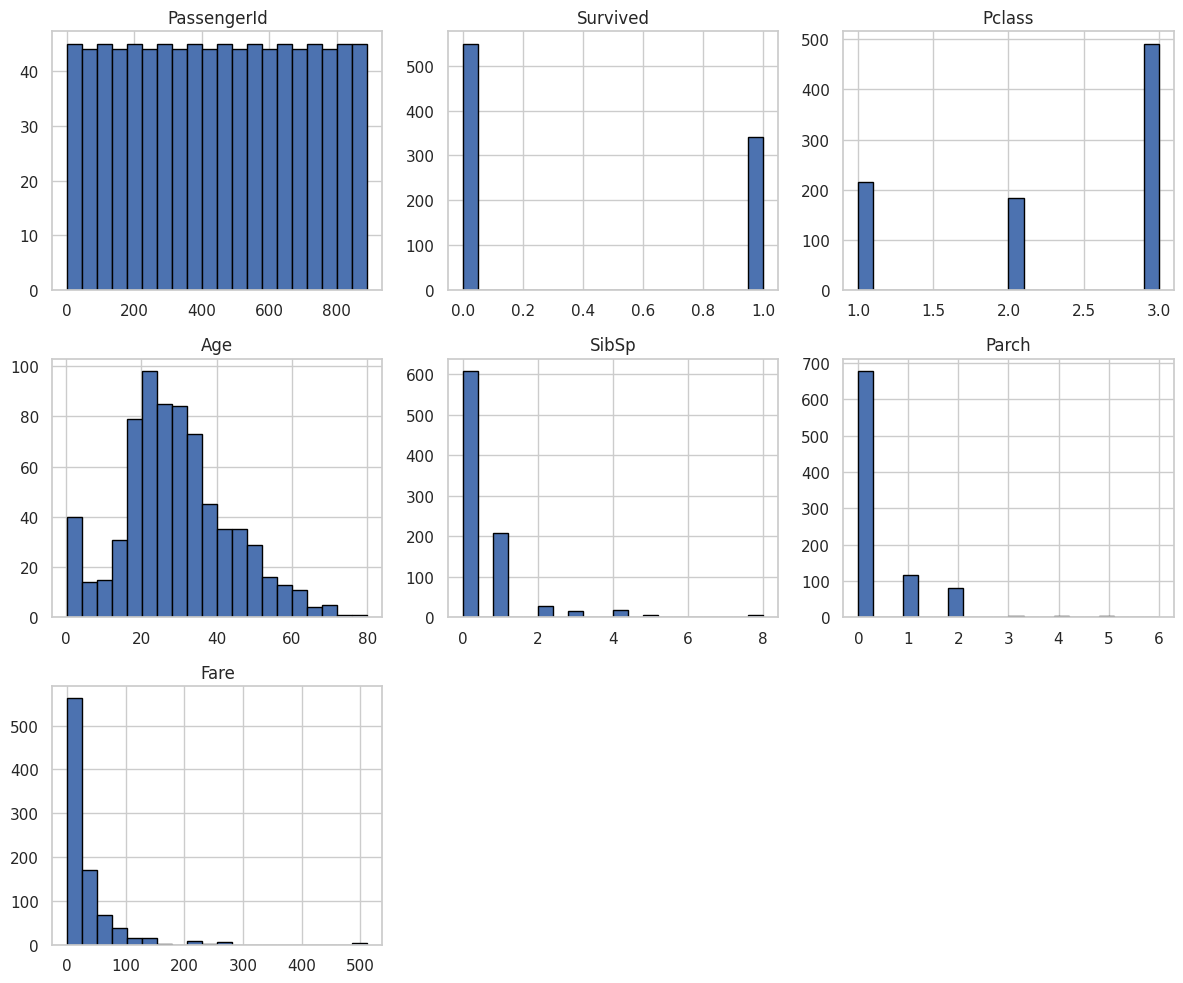

In [10]:
# Plot histograms for all numeric columns

df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

* Now i am ploting Boxplots (to see outliers)

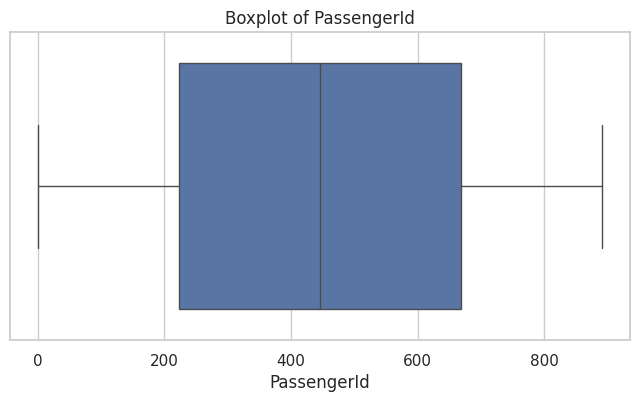

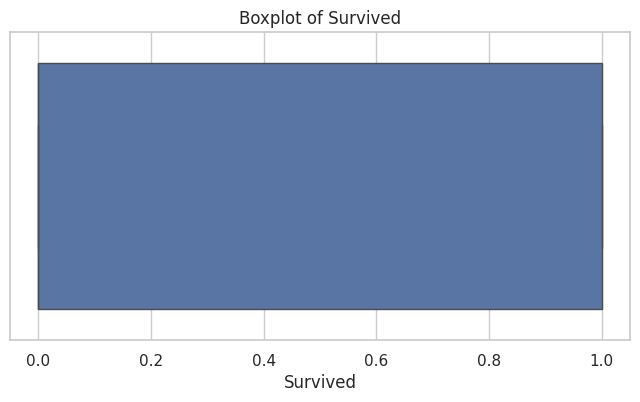

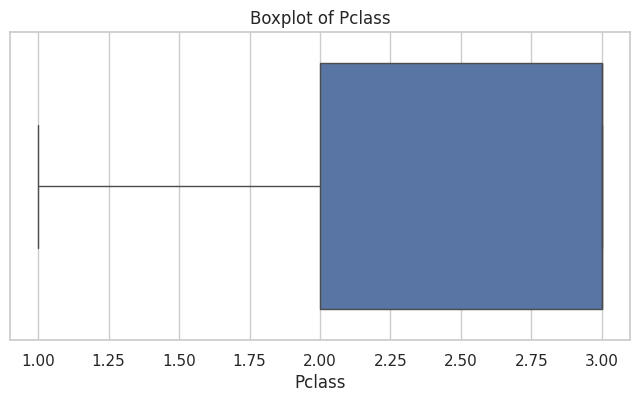

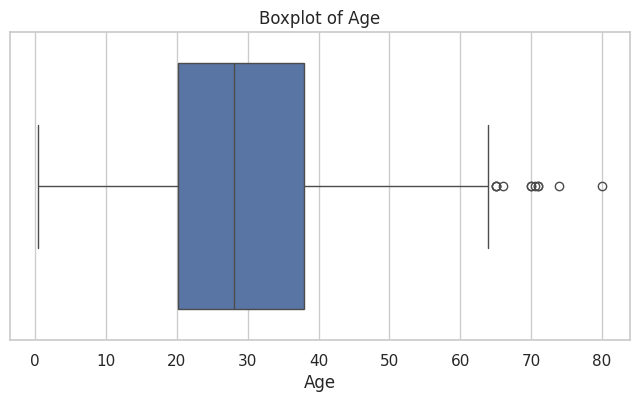

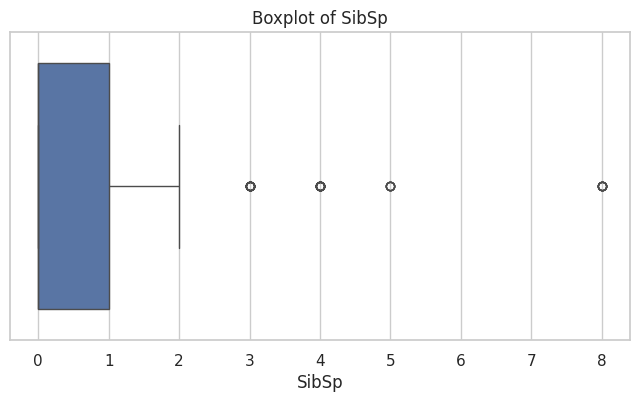

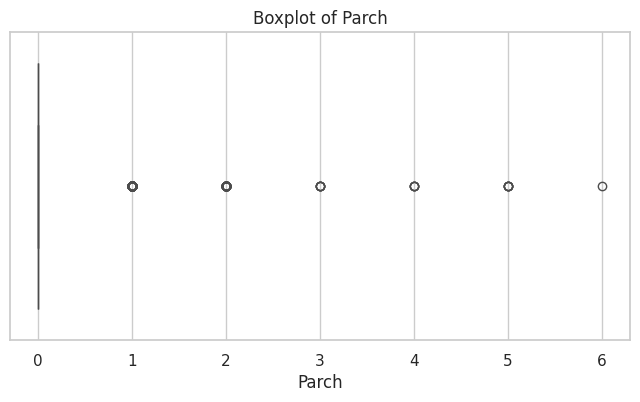

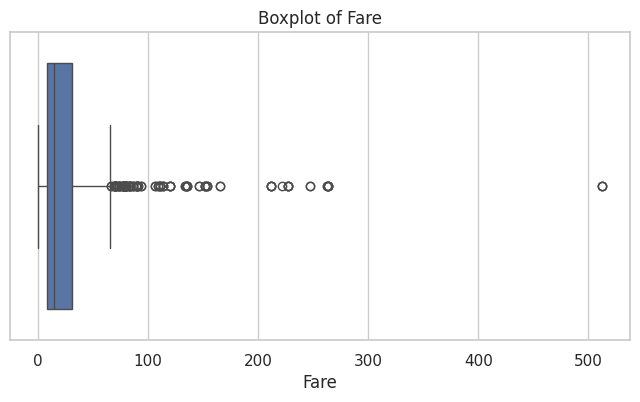

In [11]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

**Step 5**: Explore Relationships Between Features

* Correlation Matrix (Heatmap)

This shows how strongly features relate :

Values close to 1 = strong positive correlation

Values close to -1 = strong negative correlation

Near 0 = no correlation

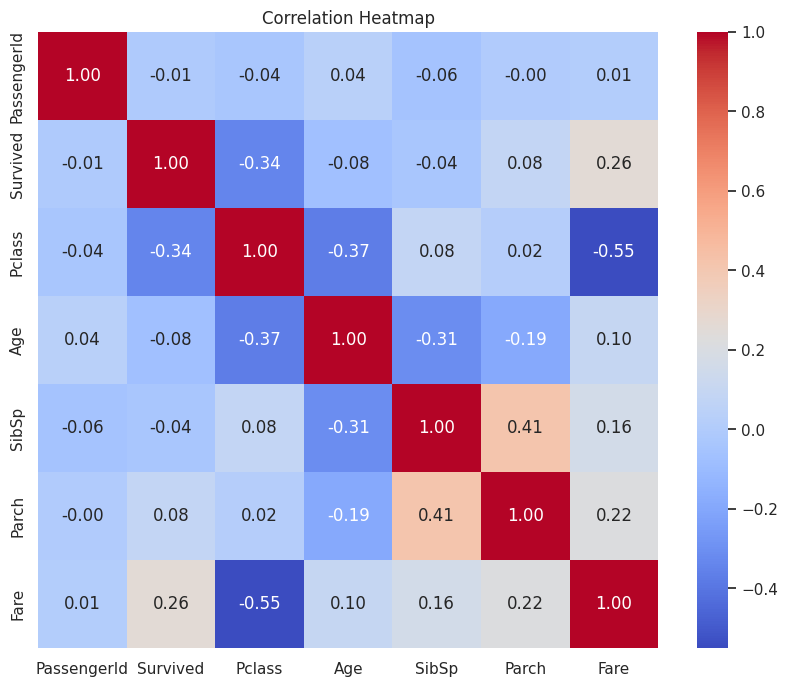

In [13]:
# Correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

* Pairplot

This creates scatter plots between pairs of features.

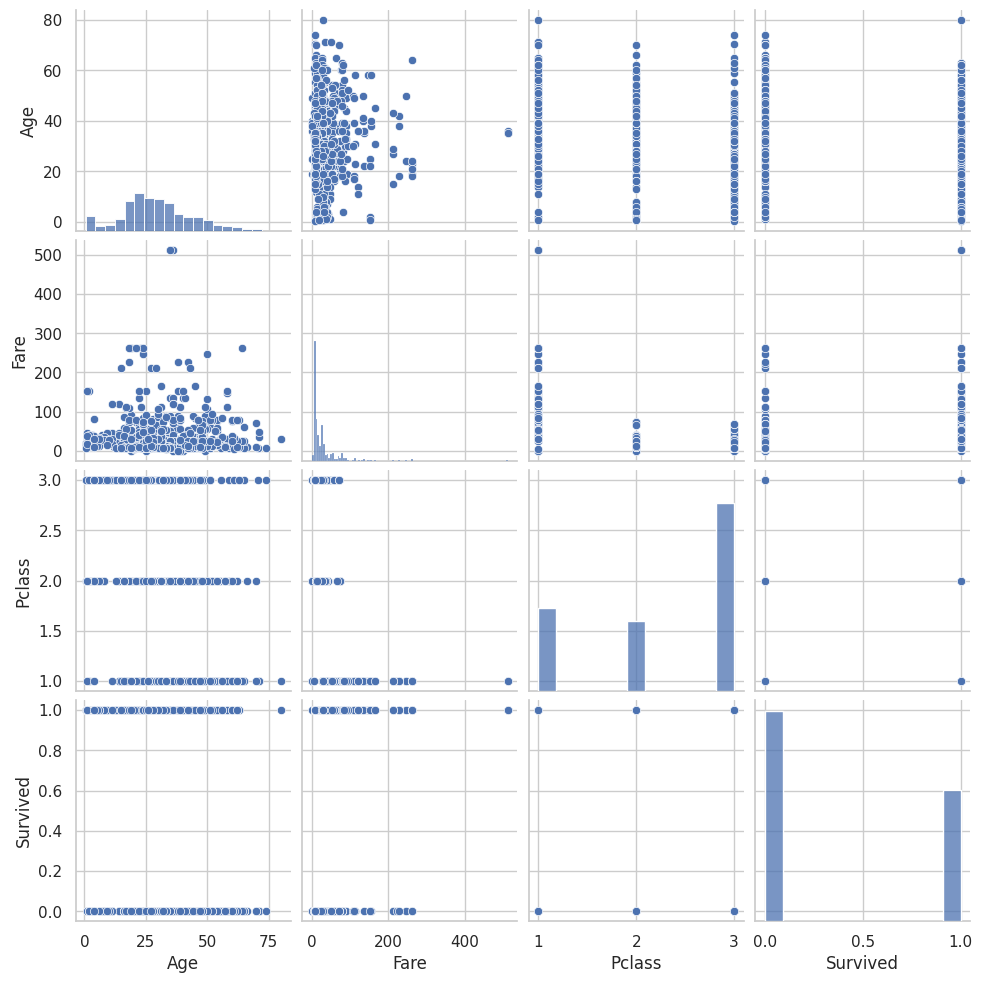

In [14]:
# Pairplot for selected numeric features

sns.pairplot(df[['Age', 'Fare' , 'Pclass', 'Survived']])
plt.show()

**Step 6** : Identify Patterns, Trends, and Anomalies

1. Survival Rate by Gender

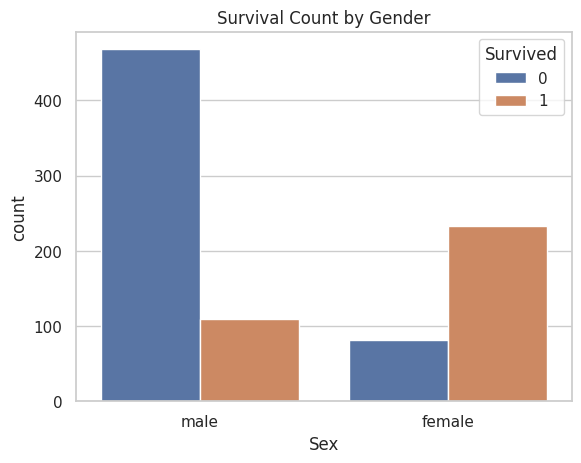

In [15]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

**Observation** : Females had a higher survival rate than males.

2. Survival Rate by Passenger Class

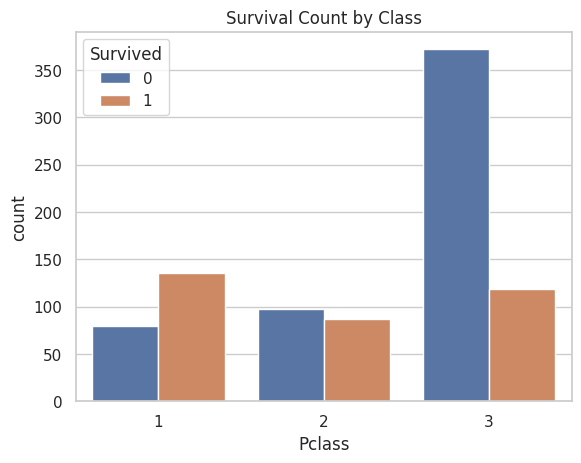

In [16]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Class')
plt.show()


**Observation** : Passengers in 1st class had higher survival rates.

3. Age Distribution by Survival

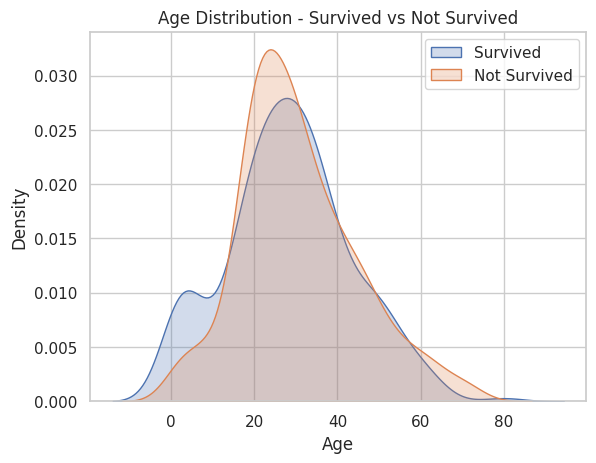

In [17]:
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', fill=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', fill=True)
plt.title('Age Distribution - Survived vs Not Survived')
plt.legend()
plt.show()

**Observation** : Children (younger passengers) had higher survival rates.

**Step 7**: Feature-Level Inference

***Sex*** :

* Female passengers had much higher survival
rates than males.

* Inference: Gender played a key role in survival chances.


 ***Pclass*** :

* Passengers in 1st class had higher survival rates than 2nd and 3rd class.

* Inference: Higher class → more survival support/access.


 ***Age*** :

* Children (low age) were more likely to survive.

* Inference: Younger passengers were likely prioritized during rescue.


 ***Fare*** :

* Wide range with outliers; higher fares were associated with 1st class.

* Inference: Fare is indirectly related to survival (via Pclass).


 ***SibSp & Parch*** :

* Survival rate was higher for passengers with small family sizes (1-2 members).

* Inference: Being with family might have helped, but larger families had lower survival rates.

So, here Task 02 completed.